<a href="https://colab.research.google.com/github/IT-17005/Transfer-Learning/blob/master/Scizophrenia_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import os 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [38]:
from google.colab import drive
drive .mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [39]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path="/content/drive/MyDrive/dataset/data/train"
valid_path="/content/drive/MyDrive/dataset/data/validation"

In [ ]:
# # Add our data-augmentation parameters to ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [40]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_path, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory( valid_path,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 282 images belonging to 2 classes.
Found 95 images belonging to 2 classes.


In [41]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

58900480/58889256 [==============================] - 2s 0us/step


In [42]:
for layer in base_model.layers:
    layer.trainable = False

In [43]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [45]:
vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 10, epochs = 5)

Epoch 1/5
10/10 [==============================] - 151s 16s/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3630 - val_acc: 0.7158
Epoch 2/5
10/10 [==============================] - 144s 15s/step - loss: 4.9474e-04 - acc: 1.0000 - val_loss: 0.4025 - val_acc: 0.7053
Epoch 3/5
10/10 [==============================] - 143s 15s/step - loss: 2.9088e-04 - acc: 1.0000 - val_loss: 0.5165 - val_acc: 0.6947
Epoch 4/5
10/10 [==============================] - 142s 15s/step - loss: 1.8973e-04 - acc: 1.0000 - val_loss: 0.5077 - val_acc: 0.6947
Epoch 5/5
10/10 [==============================] - 143s 15s/step - loss: 2.7871e-04 - acc: 1.0000 - val_loss: 0.4086 - val_acc: 0.7158


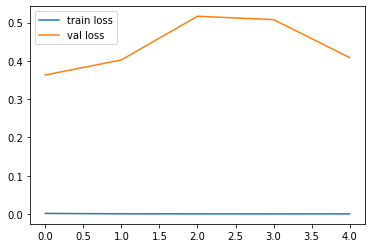

<Figure size 432x288 with 0 Axes>

In [49]:
# loss
plt.plot(vgghist.history['loss'], label='train loss')
plt.plot(vgghist.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

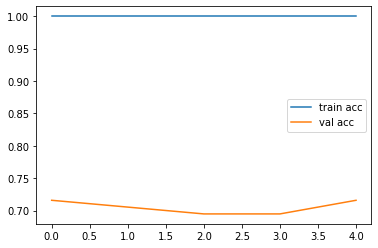

<Figure size 432x288 with 0 Axes>

In [51]:
# accuracies
plt.plot(vgghist.history['acc'], label='train acc')
plt.plot(vgghist.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')